In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the exploring the dataset

In [3]:
df=pd.read_csv('songs_normalize.csv')
df.shape

(2000, 18)

In [4]:
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [5]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

#### N0 NULL Values Found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [8]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [9]:
df['duration_ms'].describe()

count      2000.000000
mean     228748.124500
std       39136.569008
min      113000.000000
25%      203580.000000
50%      223279.500000
75%      248133.000000
max      484146.000000
Name: duration_ms, dtype: float64

In [10]:
df.duplicated().sum()

59

#### Analysing Duplicates

In [12]:
dups = df[df.duplicated(keep=False)]
dups = dups.sort_values(by=df.columns.tolist()) #stacking duplicate rows together

dups.head(10)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1456,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,1,-4.389,0,0.0334,0.00937,0.000000,0.0764,0.240,98.992,pop
1562,Ariana Grande,Love Me Harder,236133,False,2014,74,0.472,0.714,1,-4.389,0,0.0334,0.00937,0.000000,0.0764,0.240,98.992,pop
324,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
431,Baby Bash,Suga Suga,239026,False,2003,73,0.662,0.748,5,-3.041,0,0.2680,0.68800,0.000008,0.0841,0.535,82.331,"hip hop, pop, R&B, latin"
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1304,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1586,Bryson Tiller,Don't,198293,True,2015,78,0.765,0.356,11,-5.556,0,0.1950,0.22300,0.000000,0.0963,0.189,96.991,"hip hop, pop, R&B"
1679,Bryson Tiller,Don't,198293,True,2015,78,0.765,0.356,11,-5.556,0,0.1950,0.22300,0.000000,0.0963,0.189,96.991,"hip hop, pop, R&B"


In [13]:
dups.tail(20)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
635,Take That,Patience,202066,False,2006,64,0.309,0.783,10,-4.154,1,0.0405,0.142000,0.000001,0.1180,0.372,175.788,pop
739,Take That,Patience,202066,False,2006,64,0.309,0.783,10,-4.154,1,0.0405,0.142000,0.000001,0.1180,0.372,175.788,pop
596,The All-American Rejects,Dirty Little Secret,193653,False,2005,65,0.469,0.955,10,-4.253,1,0.0432,0.000343,0.000001,0.5480,0.462,143.853,"rock, pop"
695,The All-American Rejects,Dirty Little Secret,193653,False,2005,65,0.469,0.955,10,-4.253,1,0.0432,0.000343,0.000001,0.5480,0.462,143.853,"rock, pop"
1098,The Band Perry,If I Die Young,222773,False,2010,64,0.606,0.497,4,-6.611,1,0.0277,0.348000,0.000000,0.2750,0.362,130.739,country
1196,The Band Perry,If I Die Young,222773,False,2010,64,0.606,0.497,4,-6.611,1,0.0277,0.348000,0.000000,0.2750,0.362,130.739,country
844,The Pussycat Dolls,I Hate This Part,218400,False,2008,64,0.756,0.612,5,-4.371,1,0.0317,0.065900,0.000000,0.2740,0.452,111.572,"pop, R&B"
950,The Pussycat Dolls,I Hate This Part,218400,False,2008,64,0.756,0.612,5,-4.371,1,0.0317,0.065900,0.000000,0.2740,0.452,111.572,"pop, R&B"
586,The Pussycat Dolls,Stickwitu,207506,False,2005,67,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.382,79.918,"pop, R&B"
678,The Pussycat Dolls,Stickwitu,207506,False,2005,67,0.548,0.554,9,-6.408,1,0.0587,0.283000,0.000000,0.0708,0.382,79.918,"pop, R&B"


#### 59 confirmed duplicates, dropping duplicates

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(1941, 18)

In [17]:
df.duplicated().sum()

0

### Univariate Analysis

In [19]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

<Axes: xlabel='popularity', ylabel='Count'>

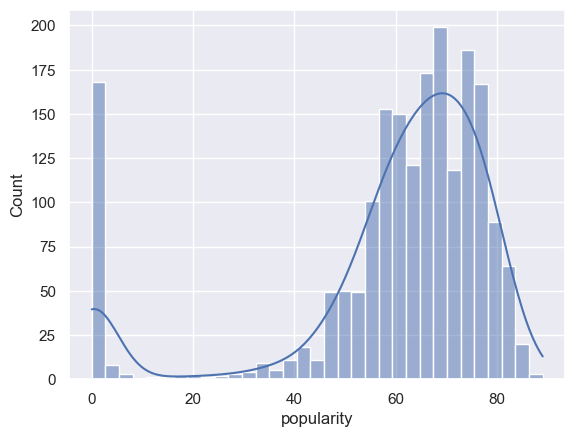

In [20]:
sns.set_style()
sns.set_theme(style='darkgrid',palette='deep')
sns.histplot(x='popularity',data=df,kde=True)

#### popularity Conclusion:most songs have achieved mass popularity, with a few with negligible popularity


<Axes: xlabel='danceability', ylabel='Count'>

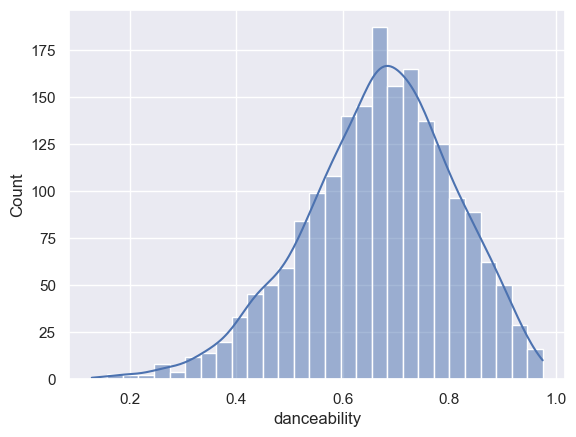

In [22]:
sns.histplot(x='danceability',data=df,kde=True)

#### Conclusion: since the peak of the graph is aroung 0.7 we can conclude most songs are danceable

<Axes: xlabel='energy', ylabel='Count'>

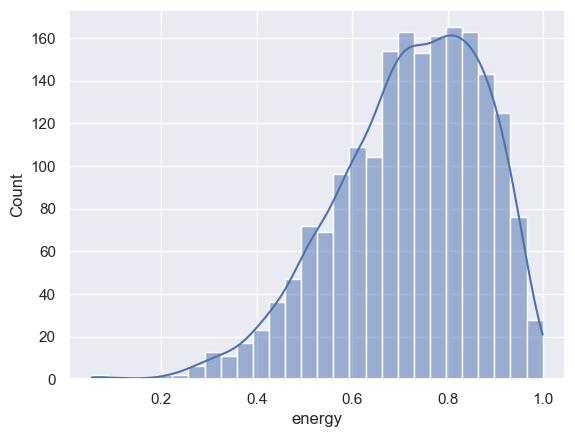

In [24]:
sns.histplot(x='energy',data=df,kde=True)

#### really high peak from 6.5- almost 9 suggests that energy level of most songs is high

In [26]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

<Axes: xlabel='speechiness', ylabel='Count'>

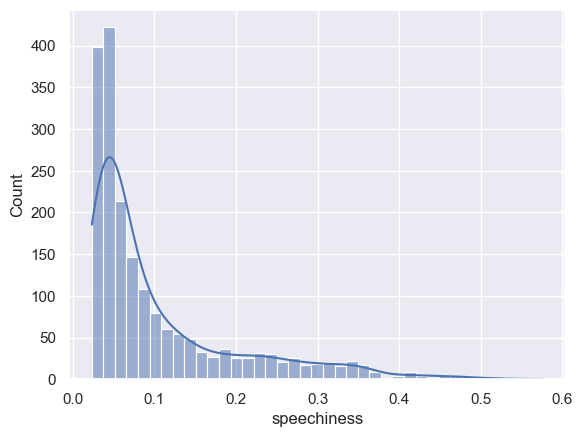

In [27]:
sns.histplot(x='speechiness',data=df,kde=True)

#### Amount of Rap/speech in most is very low less than 10% on an average, most songs are melodic with lyrics

In [29]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>, <Axes: >]], dtype=object)

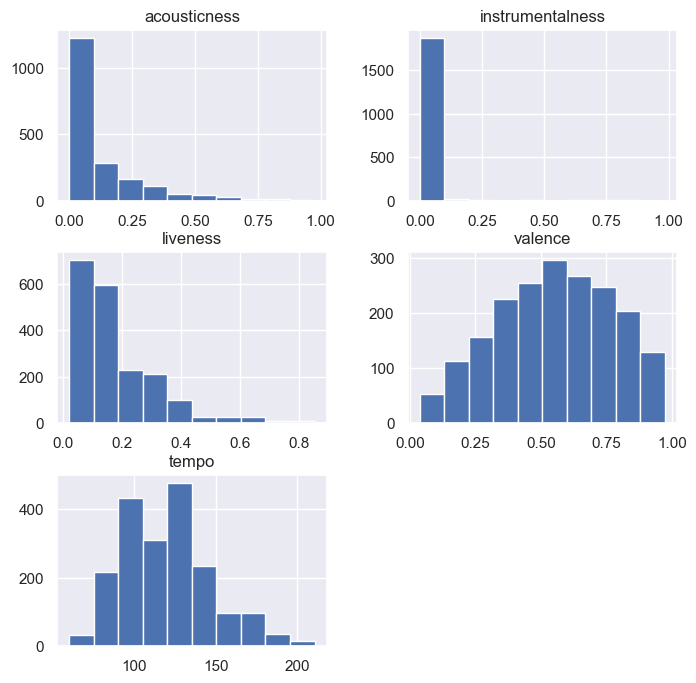

In [30]:
df[['acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].hist(figsize=(8,8))

 #### very few songs have acoustic feel. very few songs give a live feel. handful of songs have major instrumental parts.


<Axes: xlabel='tempo', ylabel='Density'>

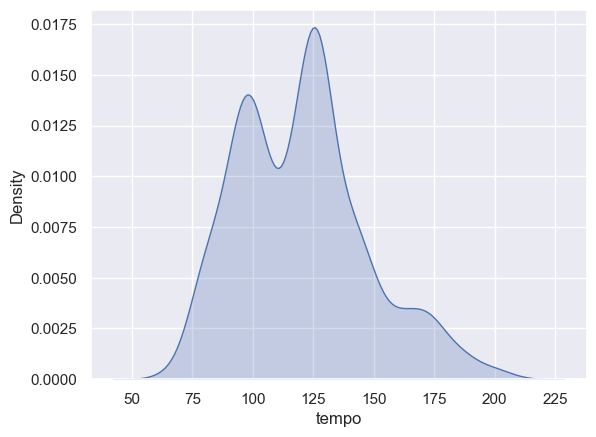

In [32]:
sns.kdeplot(x='tempo',data=df,fill=True)


Bimodal Distribution
1. The 90 BPM Peak: The "Groove" Zone
A tempo of 90 BPM is the classic "mid-tempo" sweet spot.

Genres: This is the heart of Hip-Hop, R&B, and Chill-out music.

Feel: It is often described as "moderately paced" or Moderato. It’s a comfortable pace for head-nodding and walking.

Mood: Often feels laid-back, groovy, or mellow.

2. The 125 BPM Peak: The "Dance" Zone
A tempo of 125 BPM is the global standard for high-energy, four-on-the-floor music.

Genres: This is the primary tempo for House, Techno, Pop, and Dance-Electronic tracks.

Feel: It is classified as Allegro (fast and bright). This speed aligns with a brisk walking pace and the "preferred tempo" for human exercise and clapping.

Mood: Designed to create excitement, energy, and a sense of movement.

#### Valence: mood of the song (happy/sad) the songs are normally distributed


In [35]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

<Axes: xlabel='duration_ms', ylabel='Count'>

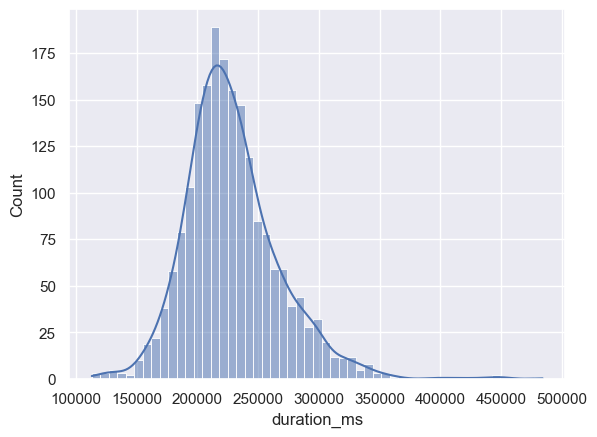

In [36]:
sns.histplot(x='duration_ms',data=df,kde=True)

#### most songs are 230000 ms long, the distribution is more or less symmettric with a few outliers on the longer duration end

<Axes: xlabel='loudness', ylabel='Count'>

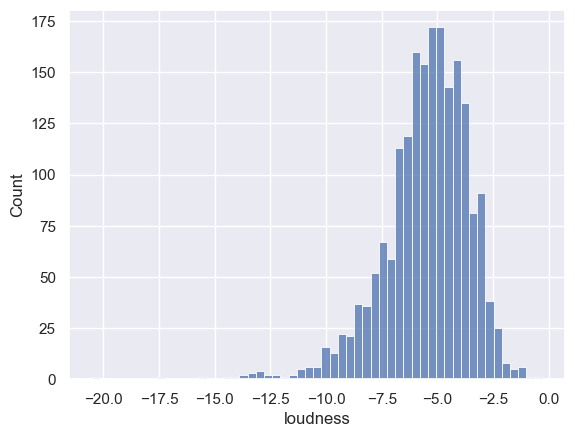

In [38]:
sns.histplot(x='loudness',data=df)

In [39]:
df['loudness'].describe()

count    1941.000000
mean       -5.514082
std         1.938950
min       -20.514000
25%        -6.490000
50%        -5.285000
75%        -4.168000
max        -0.276000
Name: loudness, dtype: float64

Mostly modern, loud tracks, Not many very quiet songs, Balanced distribution, A few extreme quiet outliers

#### The Full Dataset Profile

### Categorical and object datatype analysis

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1941 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1941 non-null   object 
 1   song              1941 non-null   object 
 2   duration_ms       1941 non-null   int64  
 3   explicit          1941 non-null   bool   
 4   year              1941 non-null   int64  
 5   popularity        1941 non-null   int64  
 6   danceability      1941 non-null   float64
 7   energy            1941 non-null   float64
 8   key               1941 non-null   int64  
 9   loudness          1941 non-null   float64
 10  mode              1941 non-null   int64  
 11  speechiness       1941 non-null   float64
 12  acousticness      1941 non-null   float64
 13  instrumentalness  1941 non-null   float64
 14  liveness          1941 non-null   float64
 15  valence           1941 non-null   float64
 16  tempo             1941 non-null   float64
 17  

#### Finding cardinality of categories

In [45]:
df['artist'].nunique()

835

In [46]:
df['year'].nunique()

23

In [47]:
df['year'].describe()

count    1941.000000
mean     2009.520350
std         5.875532
min      1998.000000
25%      2004.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: year, dtype: float64

In [48]:
df['genre'].nunique()

59

In [49]:
df['mode'].nunique()

2

In [50]:
df['key'].nunique()

12

#### Explicit, key, mode, year and genre are the features to explore

##### data has 23 unique years, 59 genres, 2 modes, 12 keys

#### Finiding Popularity BY Genre

In [54]:
df.groupby('year')['popularity'].mean().sort_values(ascending=False)

year
2018    70.519231
1999    64.921053
2008    63.208791
2019    63.011236
2002    62.104651
2009    62.024390
2005    61.663366
2010    60.524272
2012    60.203540
2007    59.477778
2001    59.349057
2014    58.970000
2003    58.758242
2004    58.631579
2000    58.239437
2011    58.062500
2006    57.161290
2015    56.741935
2013    54.551724
2016    53.948980
2017    53.845455
1998    49.000000
2020    43.333333
Name: popularity, dtype: float64

<Axes: xlabel='year'>

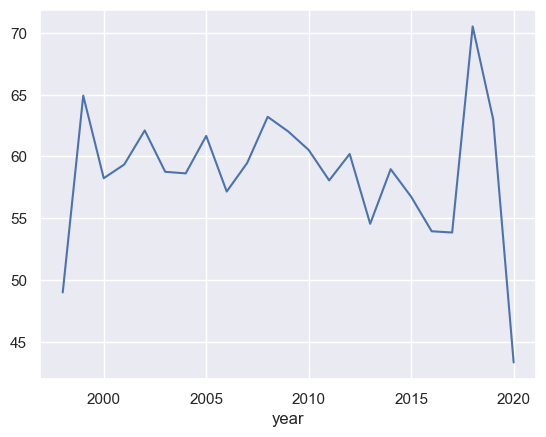

In [55]:
df.groupby('year')['popularity'].mean().plot()

In [56]:
df.groupby('mode')['popularity'].mean()

mode
0    60.098039
1    59.257914
Name: popularity, dtype: float64

#### Mode (Being in major/ minor key )does not effect popularity

In [58]:
df.groupby('key')['popularity'].mean()

key
0     58.133333
1     60.408560
2     57.233766
3     63.271186
4     60.837398
5     58.528736
6     58.472973
7     59.912371
8     62.017751
9     60.776316
10    59.548387
11    58.817708
Name: popularity, dtype: float64

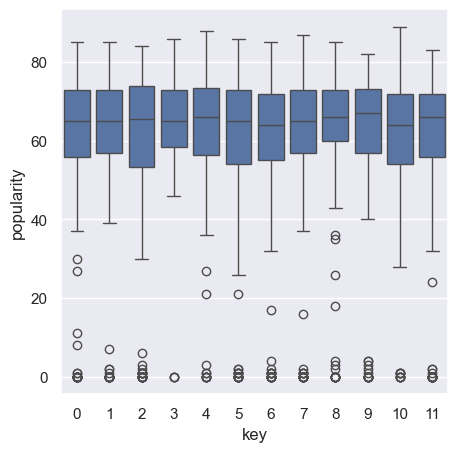

In [59]:
plt.figure(figsize=(5,5))
sns.boxplot(x='key',y='popularity',data=df)
plt.show()

#### overlapping boxplots confirm that popaularity has nothing to do with a specific key, keys are used technically
### We can conclude most categorical features have no impact on popularity, but a few genres are more popular than other in general

In [61]:
popular_genre=df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

In [136]:
top10=popular_genre.head()
top10

genre
pop, rock, Folk/Acoustic              79.0
Folk/Acoustic, pop                    78.0
rock, pop, metal, Dance/Electronic    76.0
hip hop, rock, pop                    75.0
metal                                 72.0
Name: popularity, dtype: float64

<Axes: xlabel='explicit', ylabel='popularity'>

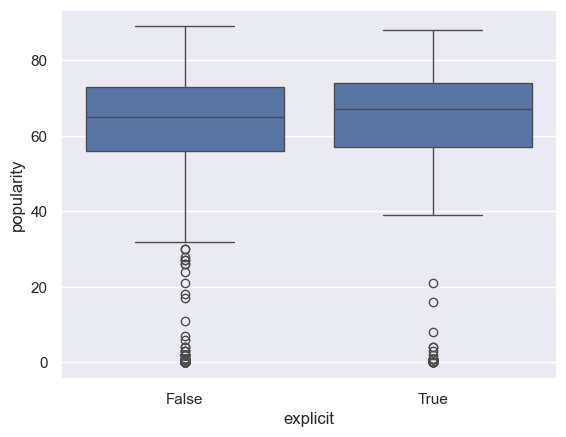

In [63]:
sns.boxplot(x='explicit',y='popularity', data=df)

#### almost similair plots for both explicit nad non- explicit lyrics

<Axes: ylabel='genre'>

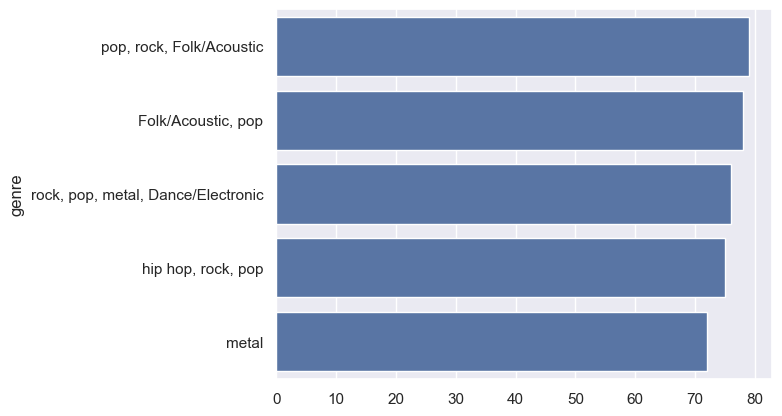

In [138]:
sns.barplot(x=top10.values, y=top10.index)


### Correlation between Features (Numerical)

In [67]:
pear=df.corr(numeric_only=True,method='pearson')['popularity'].sort_values(ascending=False)


In [68]:
spear=df.corr(method='spearman',numeric_only=True)['popularity'].sort_values(ascending=False)

In [69]:
corr_compare = pd.concat([pear, spear], axis=1)
corr_compare.columns = ['Pearson', 'Spearman']

corr_compare

,Pearson,Spearman
popularity,1.000000,1.000000
duration_ms,0.048140,-0.040751
explicit,0.047308,0.060083
loudness,0.030441,0.035656
acousticness,0.022501,0.053600
speechiness,0.021977,0.012057
key,0.013561,0.002571
tempo,0.011057,0.013932
danceability,-0.000143,-0.001801
year,-0.007294,0.199187


In [70]:
df.corr(numeric_only=True,method='pearson')['popularity'].sort_values(ascending=False)


popularity          1.000000
duration_ms         0.048140
explicit            0.047308
loudness            0.030441
acousticness        0.022501
speechiness         0.021977
key                 0.013561
tempo               0.011057
danceability       -0.000143
year               -0.007294
liveness           -0.010291
valence            -0.011012
energy             -0.013404
mode               -0.019430
instrumentalness   -0.048104
Name: popularity, dtype: float64

In [71]:
df.corr(numeric_only=True,method='spearman')['popularity'].sort_values(ascending=False)


popularity          1.000000
year                0.199187
explicit            0.060083
acousticness        0.053600
loudness            0.035656
tempo               0.013932
speechiness         0.012057
key                 0.002571
mode               -0.001160
danceability       -0.001801
liveness           -0.016250
duration_ms        -0.040751
instrumentalness   -0.063522
energy             -0.065073
valence            -0.066384
Name: popularity, dtype: float64

#### Correlation analysis shows that Spotify audio features have minimal influence on popularity. The only meaningful relationship is with release year, suggesting that recency plays a larger role than musical attributes. This implies popularity is driven more by trends, marketing, and listener behavior than by sound features alone.

<Axes: >

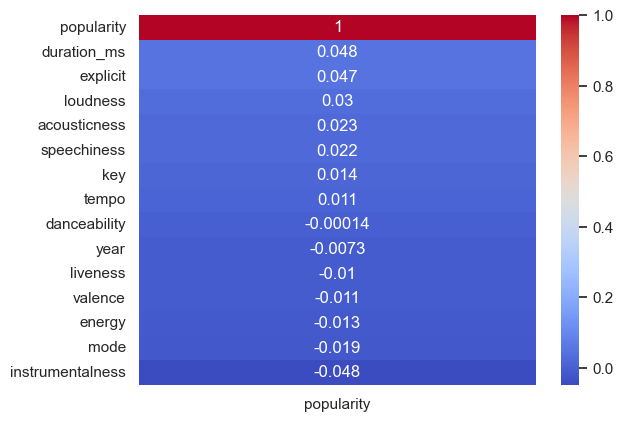

In [73]:
sns.heatmap(pear.to_frame(), annot=True, cmap='coolwarm')

<Axes: >

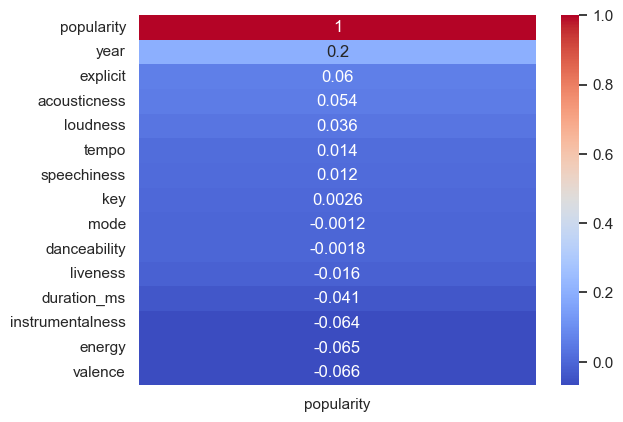

In [74]:
sns.heatmap(spear.to_frame(),annot=True,cmap='coolwarm')

<Axes: >

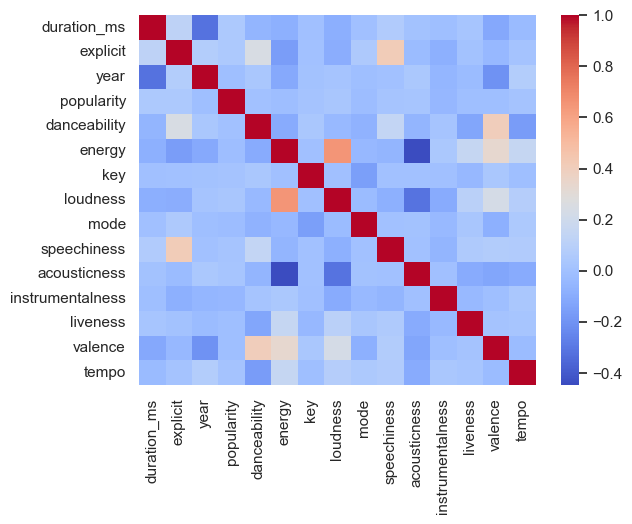

In [75]:
pear=df.corr(numeric_only=True,method='pearson')
sns.heatmap(pear,annot=False,cmap='coolwarm')

<Axes: >

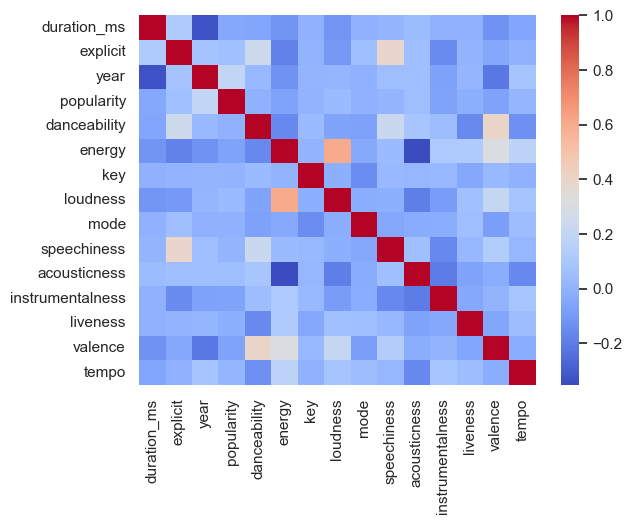

In [131]:
spear=df.corr(numeric_only=True,method='spearman')
sns.heatmap(spear,annot=False,cmap='coolwarm')

### No Strong correalation among variables

### Bivariate Analysis

### Popularity vs Danceability

<Axes: xlabel='popularity', ylabel='danceability'>

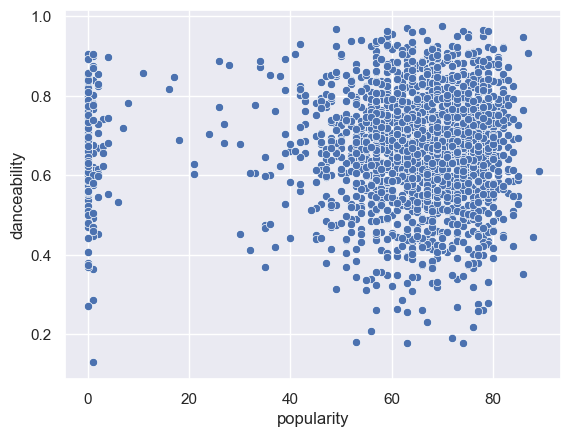

In [145]:
sns.scatterplot(x='popularity',y='danceability',data=df)

#### popularity & energy

<Axes: xlabel='popularity', ylabel='energy'>

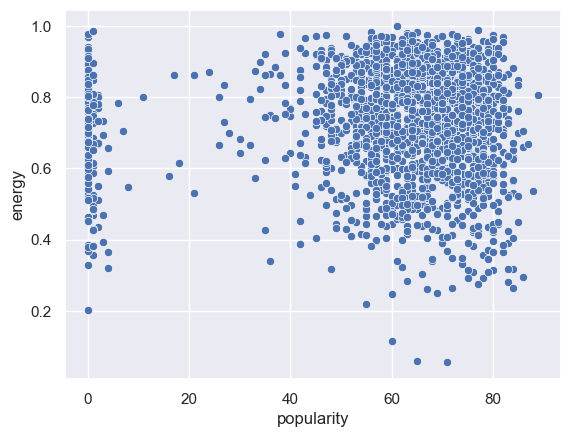

In [148]:
sns.scatterplot(x='popularity',y='energy',data=df)

#### Popularity vs Valence (Happiness)


<Axes: xlabel='valence', ylabel='popularity'>

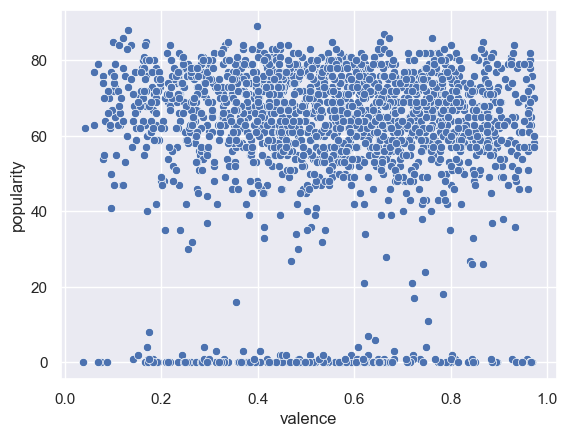

In [151]:
sns.scatterplot(x='valence', y='popularity', data=df)

#### Year vs Popularity


<Axes: xlabel='year', ylabel='popularity'>

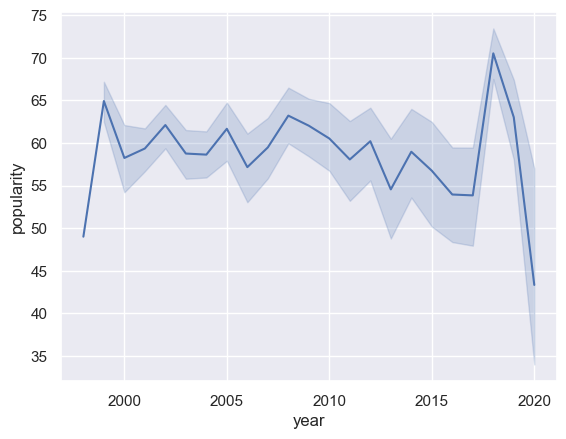

In [154]:
sns.lineplot(x='year', y='popularity', data=df)


##### year is also not a factor on popularity

### Multivariate Analysis

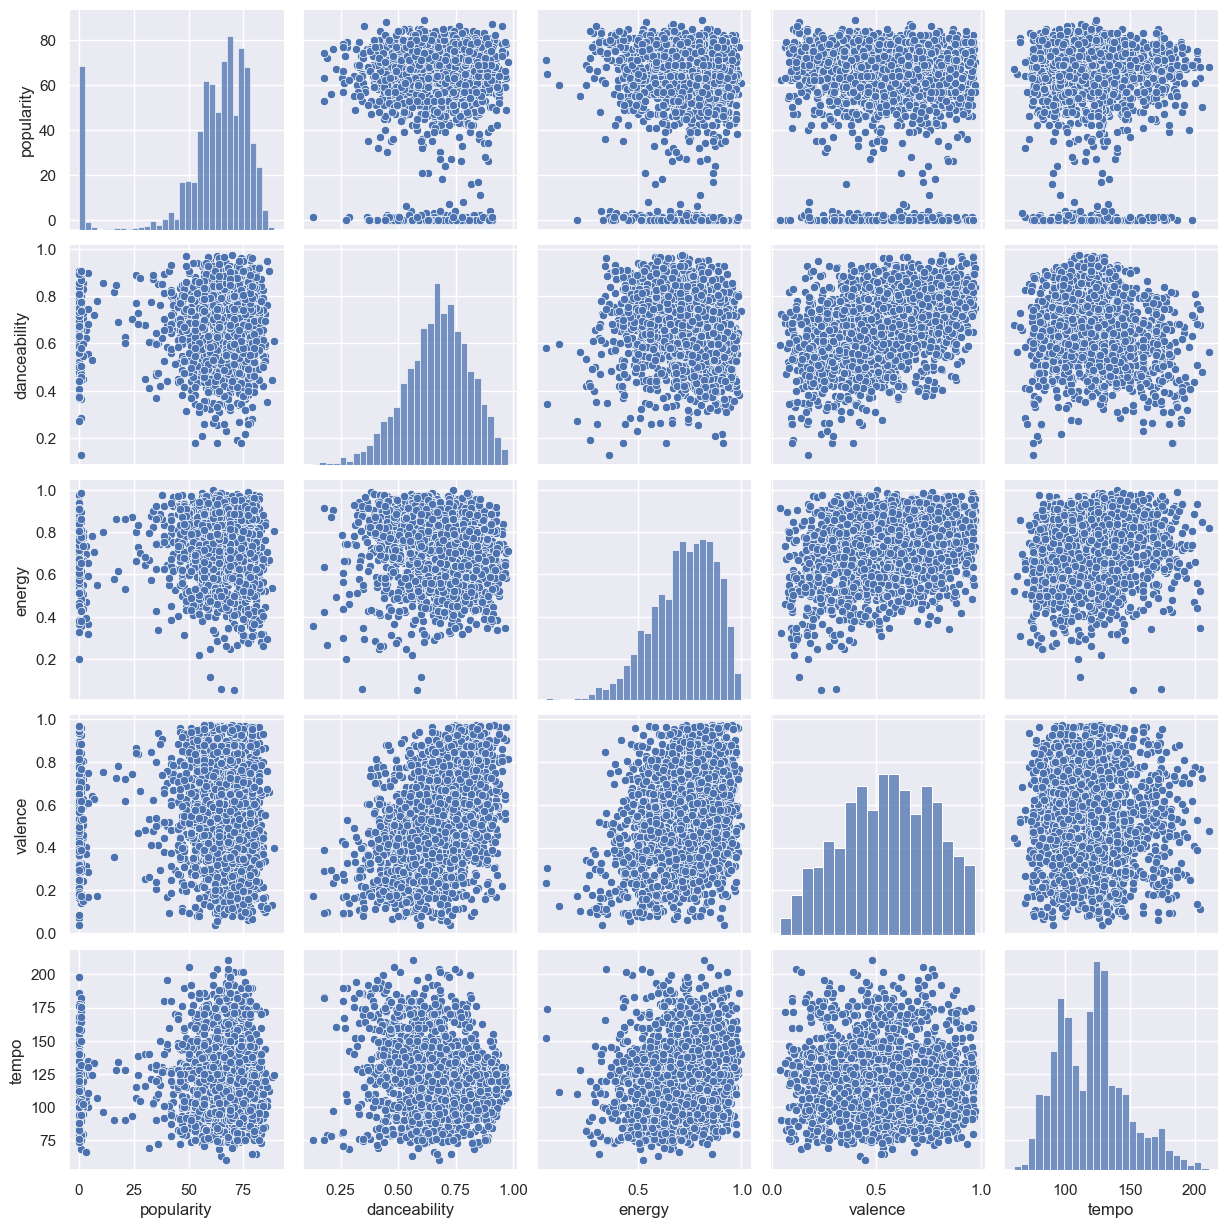

In [156]:
sns.pairplot(df[['popularity','danceability','energy','valence','tempo']])


#### Still no patterns or inferences drawn. we can conclude that for popularity of music Bivariate analysis revealed little to no relationship between audio features and popularity, indicating that musical attributes alone are insufficient predictors of success. Popularity appears to be influenced more by external and behavioral factors than by sound characteristics like Artist fame, Marketing & promotion, Social media virality, Playlist placement, Trends & culture or Release timing!

Dataset lacks marketing & playlist data

No social media metrics

No artist popularity measures

Possible genre imbalancem